# Paper - Example 1

## Initialization

In [1]:
# Import the pyKasso package
import pykasso as pk

In [2]:
# Import the pyKasso package
import pykasso as pk

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 0,
    'y0': 0,
    'z0': 0,
    'nx': 300,
    'ny': 300,
    'nz': 1,
    'dx': 10,
    'dy': 10,
    'dz': 10,
}

# Declare the project parameters
app.new_project(name='example_01', grid_parameters=grid_parameters)

In [3]:
# Declare the model parameters
model_parameters = {
    'sks' : {},
    'outlets' : {
        'data' : [[2990, 1500]],
        'number' : 1,
    },
    'inlets' : {
        'data' : [[0, 1500]],
        'number': 1,
    },
    'fractures' : {
        'generate': {
            'family_01': {
                'density'      : 0.00005,
                'orientation'  : 135,
                'dip'          : 90,
                'length'       : 300,
            },
            'family_02': {
                'density'      : 0.00005,
                'orientation'  : 45,
                'dip'          : 90,
                'length'       : 500,
            }
        }
    }
}

## Compute

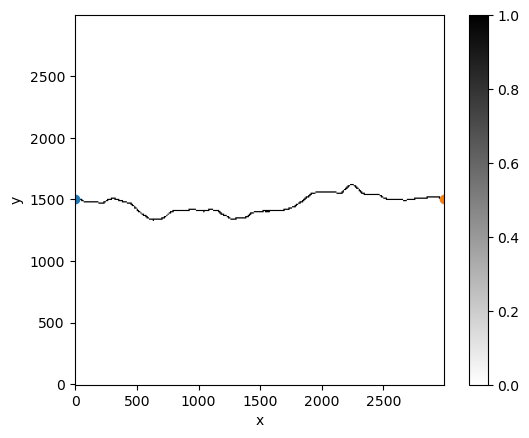

In [7]:
# Compute 100 simulations in a row
for i in range(100):
    model_parameters['sks']['seed'] = i
    app.model.generate(model_parameters=model_parameters)

In [52]:
# app.model.iterations

In [53]:
# app.model._outlets

In [54]:
# app.model.outlets

In [55]:
# app.model.conceptual_model_table

In [41]:
# app.model.model_parameters

## Plot results

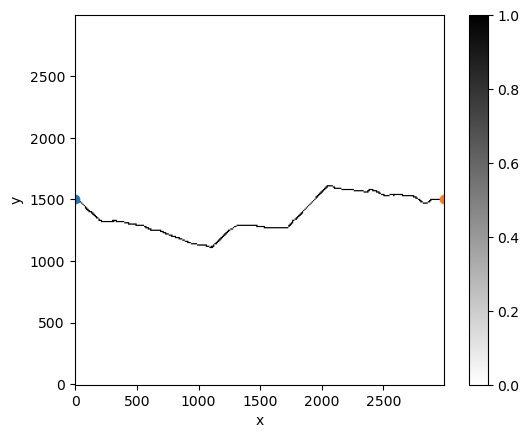

In [42]:
# Plot the last simulated karstic conduit network
f01 = app.visualizer.mpl_plot_2D(feature='karst',
                                 imshow_options={'cmap': 'binary'},
                                 scatter_inlets_options={},
                                 scatter_outlets_options={},
                                 )
f01.fig.savefig('fig/example_01_karst', bbox_inches='tight')
f01.fig

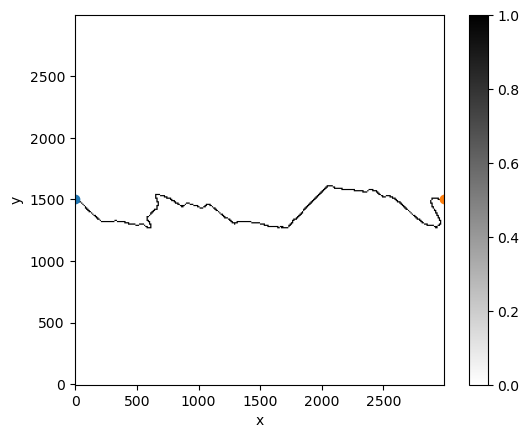

In [48]:
# Plot the last simulated karstic conduit network
f01 = app.visualizer.mpl_plot_2D(feature='karst',
                                 imshow_options={'cmap': 'binary'},
                                 scatter_inlets_options={},
                                 scatter_outlets_options={},
                                 )
f01.fig.savefig('fig/example_01_karst', bbox_inches='tight')
f01.fig

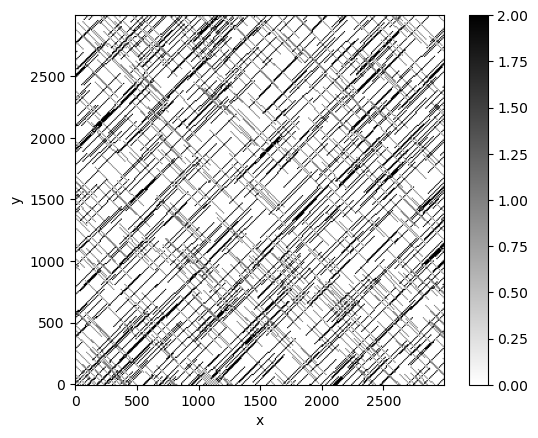

In [56]:
# Plot the fracturation model
f02 = app.visualizer.mpl_plot_2D(feature='fractures',
                                 imshow_options={'cmap': 'binary'},
                                 )
f02.fig.savefig('fig/example_01_fracturation', bbox_inches='tight')
f02.fig

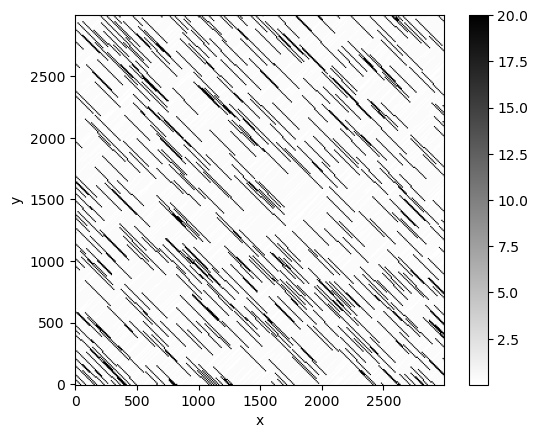

In [63]:
app.visualizer.mpl_plot_2D(feature='cost',
                                 imshow_options={'cmap': 'binary'},
                                 )

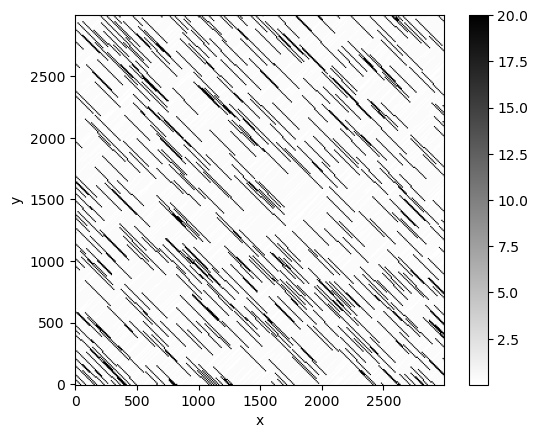

In [57]:
# Plot the cost array
f03 = app.visualizer.mpl_plot_2D(feature='cost',
                                 imshow_options={'cmap': 'binary'},
                                 )
f03.fig.savefig('fig/example_01_cost', bbox_inches='tight')
f03.fig

In [61]:
help(f03)

Help on Figure in module pykasso.visualization.visualizer object:

class Figure(builtins.tuple)
 |  Figure(fig: matplotlib.figure.Figure, ax: matplotlib.axes._axes.Axes, cbar: matplotlib.colorbar.Colorbar)
 |  
 |  `NamedTuple` storing element from a matplotlib figure.
 |  
 |  Attributes
 |  ----------
 |  fig
 |      TODO
 |  ax
 |      TODO
 |  cbar
 |      TODO
 |  
 |  Method resolution order:
 |      Figure
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new dict which maps field names to their values.
 |  
 |  _replace(self, /, **kwds)
 |      Return a new Figure object replacing specified fields with new values
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  _make(it

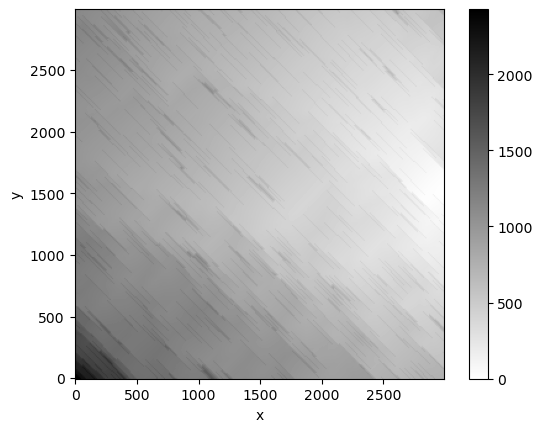

In [58]:
# Plot the time travel array
f04 = app.visualizer.mpl_plot_2D(feature='time',
                                 imshow_options={'cmap': 'binary'},
                                 )
f04.fig.savefig('fig/example_01_time', bbox_inches='tight')
f04.fig

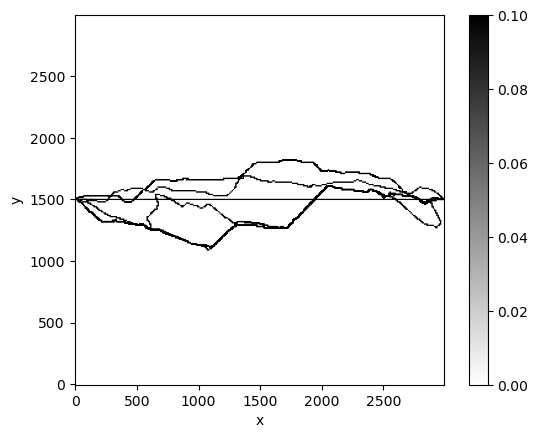

In [60]:
# Compute the mean of all the simulated karstic networks
mean = app.analyzer.compute_stats_on_networks('mean')
extent = app.project.grid.extent
imshow_options = {
    'extent' : extent,
    'cmap' : 'binary',
    'vmin' : 0,
    'vmax' : 0.1
}
f05 = app.visualizer.mpl_plot_array_2D(array=mean,
                                       imshow_options=imshow_options,
                                       show_colorbar=True
                                       )
f05.fig.savefig('fig/example_01_mean_karstic_network', bbox_inches='tight')
f05.fig